# BRI DATA HACKATHON 2021
###### Farid Lisniawan Muzakki, 25/02/2021
## Cash Ratio Optimization Category

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

keras = tf.keras

###### Open dataset from csv file

In [2]:
input_data = pd.read_csv('train.csv')
input_data

,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
0,2019-07-31,7.303000e+08,-1.304400e+09,1.436722e+11,-1.106104e+11,3.0,9.867358e+11,8.048153e+11,1.419685e+10,7.072647e+11,3.135744e+11,1.928940e+09,2.939100e+09
1,2019-08-01,7.322000e+08,-8.321500e+08,3.144131e+11,-6.710987e+10,3.0,8.962459e+11,8.125611e+11,1.234062e+10,7.011995e+11,3.135744e+11,2.492322e+11,2.839150e+09
2,2019-08-02,1.169800e+09,-6.214000e+08,1.251294e+09,-1.142332e+09,3.0,9.059714e+11,8.127225e+11,1.182022e+10,6.922787e+11,3.135744e+11,2.493411e+11,3.387550e+09
3,2019-08-03,9.134500e+08,-4.240500e+08,0.000000e+00,0.000000e+00,3.0,9.057127e+11,8.127253e+11,1.199640e+10,6.867224e+11,3.135744e+11,2.493411e+11,3.876950e+09
4,2019-08-04,7.752500e+08,-7.779500e+08,9.883331e+10,-8.729274e+10,3.0,9.788347e+11,8.124711e+11,1.232962e+10,6.813438e+11,3.135744e+11,2.608817e+11,3.874250e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2020-09-26,4.692000e+08,-2.264000e+08,0.000000e+00,0.000000e+00,3.0,6.770562e+11,7.984164e+11,1.234267e+10,7.260305e+11,2.978684e+11,1.123736e+13,5.085800e+09
421,2020-09-27,5.272500e+08,-6.187500e+08,6.466720e+10,-7.829833e+10,3.0,8.005756e+11,7.979421e+11,1.226298e+10,7.243814e+11,2.978684e+11,1.122373e+13,4.994300e+09
422,2020-09-28,7.438000e+08,-5.562000e+08,1.264345e+11,-8.203374e+10,3.0,1.531154e+12,7.961238e+11,1.521195e+10,7.234264e+11,2.978684e+11,1.126813e+13,5.181900e+09
423,2020-09-29,1.009250e+09,-7.721000e+08,1.548627e+11,-7.443120e+10,3.0,8.638740e+11,7.731039e+11,1.320539e+10,7.201773e+11,2.978684e+11,1.134856e+13,5.419050e+09


In [3]:
time = np.arange(len(input_data))

series_kantor = input_data['kas_kantor']
series_in_kantor = input_data['cash_in_kantor']
series_out_kantor = input_data['cash_out_kantor']
series_echannel = input_data['kas_echannel']
series_in_echannel = input_data['cash_in_echannel']
series_out_echannel = input_data['cash_out_echannel']

###### Plot time series graphic in dataset

In [4]:
def plot_series(series,title):
    plt.plot(series)
    plt.title(title)
    plt.show()

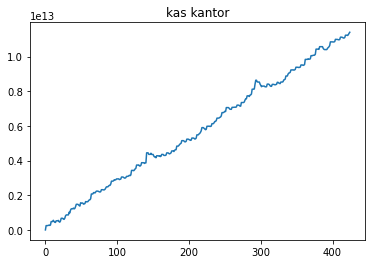

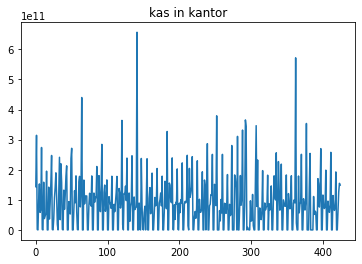

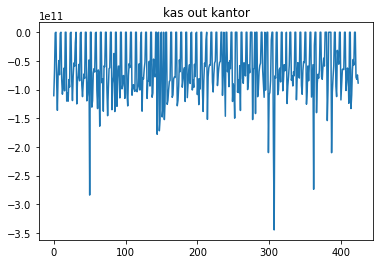

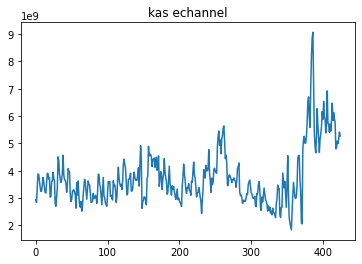

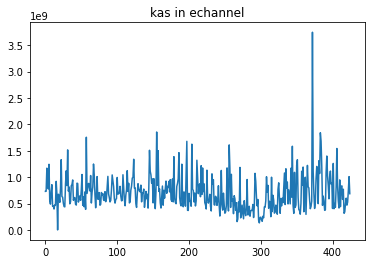

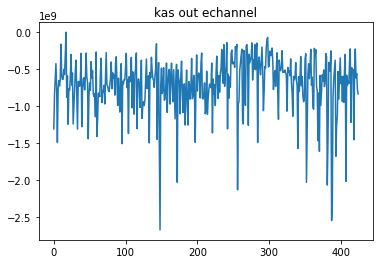

In [5]:
plot_series(series_kantor,'kas kantor')
plot_series(series_in_kantor,'kas in kantor')
plot_series(series_out_kantor,'kas out kantor')
plot_series(series_echannel,'kas echannel')
plot_series(series_in_echannel,'kas in echannel')
plot_series(series_out_echannel,'kas out echannel')

It seems that 'kas kantor' and 'kas echannel' graphic are easier to predict rather than 'in' and 'out' graphic

###### Make window and divide dataset into train, validation, and test data

In [6]:
def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [7]:
split_time = int(len(input_data)*0.7)
time_train = time[:split_time]
x_train_kantor = series_kantor[:split_time]
x_train_echannel = series_echannel[:split_time]
time_valid_test = time[split_time:]
x_valid_test_kantor = series_kantor[split_time:]
x_valid_test_echannel = series_echannel[split_time:]

split_time_2 = int(len(time_valid_test)*0.5)
time_valid = time_valid_test[:split_time_2]
x_valid_kantor = x_valid_test_kantor[:split_time_2]
x_valid_echannel = x_valid_test_echannel[:split_time_2]
time_test = time_valid_test[split_time_2:]
x_test_kantor = x_valid_test_kantor[split_time_2:]
x_test_echannel = x_valid_test_echannel[split_time_2:]

###### Build and evaluate linear neural network model for 'kas kantor' series
Adjust the hyper-parameters of the model to get the lowest error value. Because of neural network characteristics, the results can be different each time the cell is running, even with the same hyper-parameters.

In [8]:
# Linear Model for Kantor
keras.backend.clear_session()

window_size = 30
train_set = window_dataset(x_train_kantor, window_size)
valid_set = window_dataset(x_valid_kantor, window_size)

model_kantor = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])
optimizer = keras.optimizers.Adam(lr=0.01)
model_kantor.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=100)
model_kantor.fit(train_set, epochs=5000,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/5000
9/9 [==============================] - 2s 274ms/step - loss: 2495755595472.2515 - mae: 2561059586048.0000 - val_loss: 3770983645184.0000 - val_mae: 3775356469248.0000
Epoch 2/5000
9/9 [==============================] - 0s 26ms/step - loss: 1001897310341.4652 - mae: 1003663523840.0000 - val_loss: 2353014243328.0000 - val_mae: 2367679102976.0000
Epoch 3/5000
9/9 [==============================] - 0s 28ms/step - loss: 677734012828.2847 - mae: 671920685056.0000 - val_loss: 501753233408.0000 - val_mae: 484628594688.0000
Epoch 4/5000
9/9 [==============================] - 0s 26ms/step - loss: 401877434613.4532 - mae: 397651542016.0000 - val_loss: 719144943616.0000 - val_mae: 814505656320.0000
Epoch 5/5000
9/9 [==============================] - 0s 22ms/step - loss: 323853978006.5319 - mae: 329938108416.0000 - val_loss: 336093642752.0000 - val_mae: 291040919552.0000
Epoch 6/5000
9/9 [==============================] - 0s 25ms/step - loss: 233305490352.9948 - mae: 236584894464.0000 

9/9 [==============================] - 0s 24ms/step - loss: 159423428367.1491 - mae: 163115024384.0000 - val_loss: 398942633984.0000 - val_mae: 375012524032.0000
Epoch 48/5000
9/9 [==============================] - 0s 22ms/step - loss: 205020586830.8135 - mae: 201845145600.0000 - val_loss: 168305098752.0000 - val_mae: 139395170304.0000
Epoch 49/5000
9/9 [==============================] - 0s 22ms/step - loss: 185492533594.7026 - mae: 182714744832.0000 - val_loss: 118302711808.0000 - val_mae: 134753951744.0000
Epoch 50/5000
9/9 [==============================] - 0s 21ms/step - loss: 159957955968.2877 - mae: 158970331136.0000 - val_loss: 125554565120.0000 - val_mae: 153146458112.0000
Epoch 51/5000
9/9 [==============================] - 0s 23ms/step - loss: 194108253522.2652 - mae: 186255622144.0000 - val_loss: 746728456192.0000 - val_mae: 731302592512.0000
Epoch 52/5000
9/9 [==============================] - 0s 28ms/step - loss: 227245928837.6569 - mae: 235592712192.0000 - val_loss: 70264

Epoch 94/5000
9/9 [==============================] - 0s 28ms/step - loss: 177144182984.9648 - mae: 174665072640.0000 - val_loss: 142138941440.0000 - val_mae: 99622584320.0000
Epoch 95/5000
9/9 [==============================] - 0s 25ms/step - loss: 132510618710.6757 - mae: 130835447808.0000 - val_loss: 112140050432.0000 - val_mae: 106890461184.0000
Epoch 96/5000
9/9 [==============================] - 21s 2s/step - loss: 136525233381.3453 - mae: 133623676928.0000 - val_loss: 161455931392.0000 - val_mae: 114536357888.0000
Epoch 97/5000
9/9 [==============================] - 0s 22ms/step - loss: 118250344552.3176 - mae: 120318001152.0000 - val_loss: 242753617920.0000 - val_mae: 255912607744.0000
Epoch 98/5000
9/9 [==============================] - 0s 27ms/step - loss: 131536016528.9708 - mae: 132334092288.0000 - val_loss: 213375246336.0000 - val_mae: 226790375424.0000
Epoch 99/5000
9/9 [==============================] - 0s 22ms/step - loss: 132870514496.2397 - mae: 130501861376.0000 - val

9/9 [==============================] - 0s 25ms/step - loss: 128828394676.2547 - mae: 129413144576.0000 - val_loss: 197169061888.0000 - val_mae: 189188456448.0000
Epoch 141/5000
9/9 [==============================] - 0s 26ms/step - loss: 106416722220.6801 - mae: 105419825152.0000 - val_loss: 142198628352.0000 - val_mae: 148905213952.0000
Epoch 142/5000
9/9 [==============================] - 0s 27ms/step - loss: 145150849478.0884 - mae: 147161497600.0000 - val_loss: 236145360896.0000 - val_mae: 228286840832.0000
Epoch 143/5000
9/9 [==============================] - 0s 25ms/step - loss: 119763829503.0412 - mae: 119862173696.0000 - val_loss: 64993083392.0000 - val_mae: 78991327232.0000
Epoch 144/5000
9/9 [==============================] - 0s 29ms/step - loss: 93409871885.8067 - mae: 92722110464.0000 - val_loss: 193007542272.0000 - val_mae: 210404196352.0000
Epoch 145/5000
9/9 [==============================] - 0s 24ms/step - loss: 128929607532.7281 - mae: 132668948480.0000 - val_loss: 5865

Epoch 187/5000
9/9 [==============================] - 0s 25ms/step - loss: 86187981418.2352 - mae: 87690280960.0000 - val_loss: 68120485888.0000 - val_mae: 73703931904.0000
Epoch 188/5000
9/9 [==============================] - 0s 27ms/step - loss: 81266850925.6869 - mae: 81113432064.0000 - val_loss: 138186055680.0000 - val_mae: 164975624192.0000
Epoch 189/5000
9/9 [==============================] - 0s 28ms/step - loss: 96634864834.0614 - mae: 95676243968.0000 - val_loss: 290454405120.0000 - val_mae: 280556371968.0000
Epoch 190/5000
9/9 [==============================] - 0s 28ms/step - loss: 118370050150.7835 - mae: 110381727744.0000 - val_loss: 272097280000.0000 - val_mae: 294916947968.0000
Epoch 191/5000
9/9 [==============================] - 0s 26ms/step - loss: 145398534815.9281 - mae: 150236790784.0000 - val_loss: 526406123520.0000 - val_mae: 545030176768.0000
Epoch 192/5000
9/9 [==============================] - 0s 25ms/step - loss: 186407206982.5678 - mae: 193267564544.0000 - val

9/9 [==============================] - 0s 22ms/step - loss: 116716790141.9865 - mae: 119709335552.0000 - val_loss: 292908326912.0000 - val_mae: 232637235200.0000
Epoch 234/5000
9/9 [==============================] - 0s 23ms/step - loss: 97182940573.4352 - mae: 98984820736.0000 - val_loss: 109561544704.0000 - val_mae: 100599021568.0000
Epoch 235/5000
9/9 [==============================] - 0s 26ms/step - loss: 150381488236.9199 - mae: 150546644992.0000 - val_loss: 408235999232.0000 - val_mae: 387217620992.0000
Epoch 236/5000
9/9 [==============================] - 0s 25ms/step - loss: 159207955752.8449 - mae: 165308170240.0000 - val_loss: 551298203648.0000 - val_mae: 528874209280.0000
Epoch 237/5000
9/9 [==============================] - 0s 25ms/step - loss: 190859025244.6202 - mae: 198002524160.0000 - val_loss: 167464886272.0000 - val_mae: 186941063168.0000
Epoch 238/5000
9/9 [==============================] - 0s 23ms/step - loss: 86839409413.1775 - mae: 87887478784.0000 - val_loss: 2475

In [9]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [10]:
lin_forecast_kantor = model_forecast(model_kantor, series_kantor[(len(series_kantor) - split_time_2) - window_size:-1], window_size)[:, 0]

In [11]:
def plot_predicted_series(x,y_actual,y_pred,title):
    plt.figure(figsize=(10, 6))
    plt.plot(x,y_actual)
    plt.plot(x,y_pred)
    plt.title(title)
    plt.show()

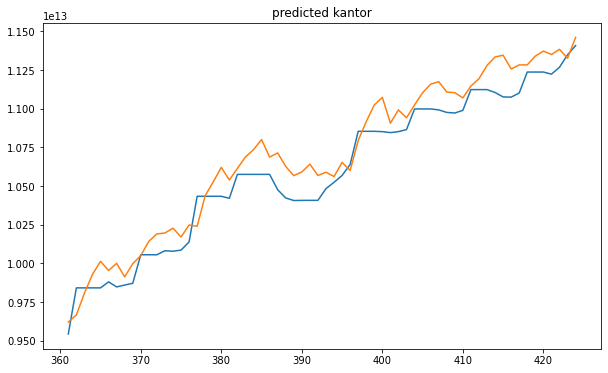

In [12]:
plot_predicted_series(time_test,x_test_kantor,lin_forecast_kantor,'predicted kantor')

In [13]:
keras.metrics.MSLE(x_test_kantor, lin_forecast_kantor).numpy()

0.00016072679

###### Predict 'kas kantor' value for the next 31 days

In [14]:
series_kantor_test = np.array(series_kantor[len(series_kantor) - window_size:])
for i in range(31):
    lin_forecast_kantor_test = model_forecast(model_kantor, series_kantor_test[len(series_kantor_test)-30:]
                                              , window_size)[:, 0]
    new_value = lin_forecast_kantor_test[len(lin_forecast_kantor_test )-1]
    series_kantor_test = np.append(series_kantor_test, lin_forecast_kantor_test)

In [15]:
series_kantor_test[len(series_kantor_test)-31:]

array([1.15327862e+13, 1.16702797e+13, 1.17602014e+13, 1.18315349e+13,
       1.19448776e+13, 1.19812915e+13, 1.21364829e+13, 1.22414904e+13,
       1.23646677e+13, 1.24868289e+13, 1.25539944e+13, 1.26876941e+13,
       1.27456541e+13, 1.28996176e+13, 1.30349783e+13, 1.31791501e+13,
       1.32963275e+13, 1.33774516e+13, 1.35247723e+13, 1.36268952e+13,
       1.37809227e+13, 1.39387701e+13, 1.41073318e+13, 1.42396663e+13,
       1.43979908e+13, 1.44952315e+13, 1.46397746e+13, 1.47784005e+13,
       1.49028298e+13, 1.50961704e+13, 1.51968536e+13])

In [16]:
#model_kantor.save('kas_kantor_forecasting.h5')

###### Build and evaluate deep neural network model for 'kas echannel' series
Adjust the hyper-parameters of the model to get the lowest error value. Because of neural network characteristics, the results can be different each time the cell is running, even with the same hyper-parameters.

In [17]:
# Dense Model for Echanncel
keras.backend.clear_session()

window_size = 23
train_echannel_set = window_dataset(x_train_echannel, window_size)
valid_echannel_set = window_dataset(x_valid_echannel, window_size)

l0 = tf.keras.layers.Dense(units=32, input_shape=[window_size], activation='relu')
l1 = tf.keras.layers.Dense(units=32, activation='relu')
l2 = tf.keras.layers.Dense(units=1)
model_echannel = tf.keras.Sequential([l0,l1,l2])

optimizer = keras.optimizers.Adam(lr=0.03)
model_echannel.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=200)
filepath = "echannel_checkpoint.h5"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
   filepath=filepath, save_best_only=True, verbose=True)

history = model_echannel.fit(train_echannel_set, epochs=5000,
          validation_data=valid_echannel_set,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/5000
      9/Unknown - 1s 136ms/step - loss: 2595847651.5556 - mae: 2656278272.0000
Epoch 00001: val_loss improved from inf to 709753728.00000, saving model to echannel_checkpoint.h5
9/9 [==============================] - 2s 198ms/step - loss: 2601890699.8657 - mae: 2656278272.0000 - val_loss: 709753728.0000 - val_mae: 679015680.0000
Epoch 2/5000
1/9 [==>...........................] - ETA: 1s - loss: 589964288.0000 - mae: 589964288.0000
Epoch 00002: val_loss improved from 709753728.00000 to 508928048.00000, saving model to echannel_checkpoint.h5
9/9 [==============================] - 0s 32ms/step - loss: 662426416.8409 - mae: 666314816.0000 - val_loss: 508928048.0000 - val_mae: 494214976.0000
Epoch 3/5000
1/9 [==>...........................] - ETA: 0s - loss: 355580352.0000 - mae: 355580352.0000
Epoch 00003: val_loss improved from 508928048.00000 to 486568832.00000, saving model to echannel_checkpoint.h5
9/9 [==============================] - 0s 28ms/step - loss: 590083531.3051

Epoch 26/5000
1/9 [==>...........................] - ETA: 0s - loss: 432970336.0000 - mae: 432970336.0000
Epoch 00026: val_loss did not improve from 349123560.00000
9/9 [==============================] - 0s 24ms/step - loss: 354993167.8131 - mae: 355610176.0000 - val_loss: 405351520.0000 - val_mae: 392983936.0000
Epoch 27/5000
1/9 [==>...........................] - ETA: 0s - loss: 383516416.0000 - mae: 383516416.0000
Epoch 00027: val_loss did not improve from 349123560.00000
9/9 [==============================] - 0s 20ms/step - loss: 324933070.4934 - mae: 322584032.0000 - val_loss: 407072320.0000 - val_mae: 369443968.0000
Epoch 28/5000
1/9 [==>...........................] - ETA: 0s - loss: 331744288.0000 - mae: 331744288.0000
Epoch 00028: val_loss did not improve from 349123560.00000
9/9 [==============================] - 0s 21ms/step - loss: 325155332.0642 - mae: 323949536.0000 - val_loss: 481513296.0000 - val_mae: 390608640.0000
Epoch 29/5000
1/9 [==>...........................] - ET

Epoch 52/5000
1/9 [==>...........................] - ETA: 0s - loss: 339316416.0000 - mae: 339316416.0000
Epoch 00052: val_loss improved from 302197696.00000 to 272862784.00000, saving model to echannel_checkpoint.h5
9/9 [==============================] - 0s 28ms/step - loss: 280648562.6161 - mae: 280818016.0000 - val_loss: 272862784.0000 - val_mae: 334936160.0000
Epoch 53/5000
1/9 [==>...........................] - ETA: 0s - loss: 239440160.0000 - mae: 239440160.0000
Epoch 00053: val_loss did not improve from 272862784.00000
9/9 [==============================] - 0s 23ms/step - loss: 267839839.7547 - mae: 268664032.0000 - val_loss: 362258032.0000 - val_mae: 340582592.0000
Epoch 54/5000
1/9 [==>...........................] - ETA: 0s - loss: 292938016.0000 - mae: 292938016.0000
Epoch 00054: val_loss did not improve from 272862784.00000
9/9 [==============================] - 0s 23ms/step - loss: 272707546.0905 - mae: 269972640.0000 - val_loss: 325591184.0000 - val_mae: 334017120.0000
Epo

Epoch 78/5000
1/9 [==>...........................] - ETA: 1s - loss: 222325024.0000 - mae: 222325024.0000
Epoch 00078: val_loss did not improve from 272862784.00000
9/9 [==============================] - 0s 29ms/step - loss: 273036613.8044 - mae: 275162080.0000 - val_loss: 359967392.0000 - val_mae: 344875520.0000
Epoch 79/5000
1/9 [==>...........................] - ETA: 0s - loss: 261446464.0000 - mae: 261446464.0000
Epoch 00079: val_loss did not improve from 272862784.00000
9/9 [==============================] - 0s 25ms/step - loss: 283516825.8569 - mae: 278058880.0000 - val_loss: 350934384.0000 - val_mae: 323586848.0000
Epoch 80/5000
1/9 [==>...........................] - ETA: 0s - loss: 273099712.0000 - mae: 273099712.0000
Epoch 00080: val_loss did not improve from 272862784.00000
9/9 [==============================] - 0s 26ms/step - loss: 262508095.4745 - mae: 261465984.0000 - val_loss: 387088560.0000 - val_mae: 321157472.0000
Epoch 81/5000
1/9 [==>...........................] - ET

Epoch 104/5000
1/9 [==>...........................] - ETA: 0s - loss: 296061440.0000 - mae: 296061440.0000
Epoch 00104: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 22ms/step - loss: 296909842.3358 - mae: 296794912.0000 - val_loss: 364862432.0000 - val_mae: 318136320.0000
Epoch 105/5000
1/9 [==>...........................] - ETA: 0s - loss: 241194272.0000 - mae: 241194272.0000
Epoch 00105: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 21ms/step - loss: 260410396.4613 - mae: 262410992.0000 - val_loss: 382009232.0000 - val_mae: 366923008.0000
Epoch 106/5000
1/9 [==>...........................] - ETA: 0s - loss: 372798912.0000 - mae: 372798912.0000
Epoch 00106: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 25ms/step - loss: 261164949.3372 - mae: 264046704.0000 - val_loss: 278164880.0000 - val_mae: 331860192.0000
Epoch 107/5000
1/9 [==>...........................] 

Epoch 130/5000
1/9 [==>...........................] - ETA: 0s - loss: 314632128.0000 - mae: 314632128.0000
Epoch 00130: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 23ms/step - loss: 313057336.1985 - mae: 315431744.0000 - val_loss: 311036296.0000 - val_mae: 351000576.0000
Epoch 131/5000
1/9 [==>...........................] - ETA: 0s - loss: 361855232.0000 - mae: 361855232.0000
Epoch 00131: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 22ms/step - loss: 285711796.2978 - mae: 287113920.0000 - val_loss: 339643264.0000 - val_mae: 324981472.0000
Epoch 132/5000
1/9 [==>...........................] - ETA: 0s - loss: 190316576.0000 - mae: 190316576.0000
Epoch 00132: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 24ms/step - loss: 264109334.7036 - mae: 260511616.0000 - val_loss: 354048704.0000 - val_mae: 359264896.0000
Epoch 133/5000
1/9 [==>...........................] 

Epoch 156/5000
1/9 [==>...........................] - ETA: 0s - loss: 325934496.0000 - mae: 325934496.0000
Epoch 00156: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 23ms/step - loss: 256579318.7854 - mae: 251655184.0000 - val_loss: 353135392.0000 - val_mae: 314227392.0000
Epoch 157/5000
1/9 [==>...........................] - ETA: 0s - loss: 274133632.0000 - mae: 274133632.0000
Epoch 00157: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 25ms/step - loss: 244414244.9285 - mae: 243589552.0000 - val_loss: 354060176.0000 - val_mae: 330660544.0000
Epoch 158/5000
1/9 [==>...........................] - ETA: 0s - loss: 258377456.0000 - mae: 258377456.0000
Epoch 00158: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 25ms/step - loss: 255841199.8248 - mae: 253645840.0000 - val_loss: 295052160.0000 - val_mae: 317795968.0000
Epoch 159/5000
1/9 [==>...........................] 

Epoch 182/5000
1/9 [==>...........................] - ETA: 0s - loss: 334920640.0000 - mae: 334920640.0000
Epoch 00182: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 26ms/step - loss: 257461507.0482 - mae: 257504912.0000 - val_loss: 487760784.0000 - val_mae: 401077056.0000
Epoch 183/5000
1/9 [==>...........................] - ETA: 0s - loss: 346888544.0000 - mae: 346888544.0000
Epoch 00183: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 21ms/step - loss: 298928333.5358 - mae: 301534656.0000 - val_loss: 335513040.0000 - val_mae: 356265504.0000
Epoch 184/5000
1/9 [==>...........................] - ETA: 0s - loss: 260023200.0000 - mae: 260023200.0000
Epoch 00184: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 23ms/step - loss: 282583342.5518 - mae: 280129568.0000 - val_loss: 447647776.0000 - val_mae: 347762208.0000
Epoch 185/5000
1/9 [==>...........................] 

Epoch 208/5000
1/9 [==>...........................] - ETA: 0s - loss: 249262400.0000 - mae: 249262400.0000
Epoch 00208: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 23ms/step - loss: 285475753.6234 - mae: 283339072.0000 - val_loss: 363009696.0000 - val_mae: 344339872.0000
Epoch 209/5000
1/9 [==>...........................] - ETA: 0s - loss: 246964256.0000 - mae: 246964256.0000
Epoch 00209: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 21ms/step - loss: 244427164.9401 - mae: 243285440.0000 - val_loss: 367550288.0000 - val_mae: 318624544.0000
Epoch 210/5000
1/9 [==>...........................] - ETA: 0s - loss: 248579552.0000 - mae: 248579552.0000
Epoch 00210: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 24ms/step - loss: 265771470.7153 - mae: 262184000.0000 - val_loss: 365124224.0000 - val_mae: 345490496.0000
Epoch 211/5000
1/9 [==>...........................] 

Epoch 234/5000
1/9 [==>...........................] - ETA: 1s - loss: 370263808.0000 - mae: 370263808.0000
Epoch 00234: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 28ms/step - loss: 278881457.1095 - mae: 286450784.0000 - val_loss: 331168256.0000 - val_mae: 331811360.0000
Epoch 235/5000
1/9 [==>...........................] - ETA: 0s - loss: 311495360.0000 - mae: 311495360.0000
Epoch 00235: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 23ms/step - loss: 253327635.3285 - mae: 255424624.0000 - val_loss: 319508688.0000 - val_mae: 314758272.0000
Epoch 236/5000
1/9 [==>...........................] - ETA: 0s - loss: 234365376.0000 - mae: 234365376.0000
Epoch 00236: val_loss did not improve from 253758672.00000
9/9 [==============================] - 0s 26ms/step - loss: 272285805.1620 - mae: 272655072.0000 - val_loss: 345006800.0000 - val_mae: 333623456.0000
Epoch 237/5000
1/9 [==>...........................] 

Epoch 260/5000
1/9 [==>...........................] - ETA: 1s - loss: 211557280.0000 - mae: 211557280.0000
Epoch 00260: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 25ms/step - loss: 258848718.1080 - mae: 251694112.0000 - val_loss: 303857856.0000 - val_mae: 313631328.0000
Epoch 261/5000
1/9 [==>...........................] - ETA: 0s - loss: 225491744.0000 - mae: 225491744.0000
Epoch 00261: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 24ms/step - loss: 249675221.0569 - mae: 251068304.0000 - val_loss: 352020064.0000 - val_mae: 348117248.0000
Epoch 262/5000
1/9 [==>...........................] - ETA: 0s - loss: 265453184.0000 - mae: 265453184.0000
Epoch 00262: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 21ms/step - loss: 259682440.9109 - mae: 257426928.0000 - val_loss: 327626656.0000 - val_mae: 323280032.0000
Epoch 263/5000
1/9 [==>...........................] 

Epoch 286/5000
1/9 [==>...........................] - ETA: 0s - loss: 239650944.0000 - mae: 239650944.0000
Epoch 00286: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 25ms/step - loss: 285955292.4029 - mae: 279719296.0000 - val_loss: 289228728.0000 - val_mae: 317324160.0000
Epoch 287/5000
1/9 [==>...........................] - ETA: 0s - loss: 245877248.0000 - mae: 245877248.0000
Epoch 00287: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 22ms/step - loss: 254574408.5372 - mae: 256387840.0000 - val_loss: 286107848.0000 - val_mae: 318257152.0000
Epoch 288/5000
1/9 [==>...........................] - ETA: 0s - loss: 238111264.0000 - mae: 238111264.0000
Epoch 00288: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 22ms/step - loss: 256955521.0978 - mae: 255511792.0000 - val_loss: 284126408.0000 - val_mae: 316840800.0000
Epoch 289/5000
1/9 [==>...........................] 

Epoch 312/5000
1/9 [==>...........................] - ETA: 0s - loss: 203252416.0000 - mae: 203252416.0000
Epoch 00312: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 25ms/step - loss: 244186921.7635 - mae: 246909696.0000 - val_loss: 346263536.0000 - val_mae: 358347680.0000
Epoch 313/5000
1/9 [==>...........................] - ETA: 0s - loss: 301401344.0000 - mae: 301401344.0000
Epoch 00313: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 24ms/step - loss: 271587678.3883 - mae: 271184736.0000 - val_loss: 331001472.0000 - val_mae: 314282144.0000
Epoch 314/5000
1/9 [==>...........................] - ETA: 0s - loss: 232104928.0000 - mae: 232104928.0000
Epoch 00314: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 26ms/step - loss: 343708698.2657 - mae: 343203072.0000 - val_loss: 400064592.0000 - val_mae: 382392000.0000
Epoch 315/5000
1/9 [==>...........................] 

Epoch 338/5000
1/9 [==>...........................] - ETA: 0s - loss: 235201664.0000 - mae: 235201664.0000
Epoch 00338: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 22ms/step - loss: 261094414.7504 - mae: 260345760.0000 - val_loss: 324627600.0000 - val_mae: 318997568.0000
Epoch 339/5000
1/9 [==>...........................] - ETA: 0s - loss: 213260576.0000 - mae: 213260576.0000
Epoch 00339: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 25ms/step - loss: 261165504.6307 - mae: 256267040.0000 - val_loss: 362246704.0000 - val_mae: 335028064.0000
Epoch 340/5000
1/9 [==>...........................] - ETA: 0s - loss: 274650816.0000 - mae: 274650816.0000
Epoch 00340: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 25ms/step - loss: 240058091.4686 - mae: 240105616.0000 - val_loss: 352335792.0000 - val_mae: 359398016.0000
Epoch 341/5000
1/9 [==>...........................] 

Epoch 364/5000
1/9 [==>...........................] - ETA: 0s - loss: 228187040.0000 - mae: 228187040.0000
Epoch 00364: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 23ms/step - loss: 238085431.7080 - mae: 240508864.0000 - val_loss: 299814864.0000 - val_mae: 350391264.0000
Epoch 365/5000
1/9 [==>...........................] - ETA: 0s - loss: 219821616.0000 - mae: 219821616.0000
Epoch 00365: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 22ms/step - loss: 276204062.8672 - mae: 273302592.0000 - val_loss: 334781280.0000 - val_mae: 325668032.0000
Epoch 366/5000
1/9 [==>...........................] - ETA: 1s - loss: 268062112.0000 - mae: 268062112.0000
Epoch 00366: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 28ms/step - loss: 244035598.0964 - mae: 244769824.0000 - val_loss: 324357952.0000 - val_mae: 313342144.0000
Epoch 367/5000
1/9 [==>...........................] 

Epoch 390/5000
1/9 [==>...........................] - ETA: 0s - loss: 294319296.0000 - mae: 294319296.0000
Epoch 00390: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 24ms/step - loss: 244120697.0628 - mae: 241679152.0000 - val_loss: 332513808.0000 - val_mae: 315089760.0000
Epoch 391/5000
1/9 [==>...........................] - ETA: 0s - loss: 248580576.0000 - mae: 248580576.0000
Epoch 00391: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 26ms/step - loss: 269080709.5124 - mae: 267469456.0000 - val_loss: 262518472.0000 - val_mae: 311831360.0000
Epoch 392/5000
1/9 [==>...........................] - ETA: 0s - loss: 223789024.0000 - mae: 223789024.0000
Epoch 00392: val_loss did not improve from 247257232.00000
9/9 [==============================] - 0s 19ms/step - loss: 249466965.5825 - mae: 248760432.0000 - val_loss: 276244520.0000 - val_mae: 313020928.0000
Epoch 393/5000
1/9 [==>...........................] 

Epoch 416/5000
1/9 [==>...........................] - ETA: 0s - loss: 215257376.0000 - mae: 215257376.0000
Epoch 00416: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 24ms/step - loss: 237260310.3533 - mae: 235506752.0000 - val_loss: 359829184.0000 - val_mae: 316906560.0000
Epoch 417/5000
1/9 [==>...........................] - ETA: 1s - loss: 214888096.0000 - mae: 214888096.0000
Epoch 00417: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 27ms/step - loss: 240152291.0599 - mae: 241240896.0000 - val_loss: 306806752.0000 - val_mae: 322963520.0000
Epoch 418/5000
1/9 [==>...........................] - ETA: 0s - loss: 189679520.0000 - mae: 189679520.0000
Epoch 00418: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 23ms/step - loss: 237601446.1080 - mae: 231734352.0000 - val_loss: 414400816.0000 - val_mae: 343392544.0000
Epoch 419/5000
1/9 [==>...........................] 

Epoch 442/5000
1/9 [==>...........................] - ETA: 0s - loss: 267133728.0000 - mae: 267133728.0000
Epoch 00442: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 23ms/step - loss: 244692699.8774 - mae: 248117920.0000 - val_loss: 315187024.0000 - val_mae: 320036704.0000
Epoch 443/5000
1/9 [==>...........................] - ETA: 1s - loss: 328707712.0000 - mae: 328707712.0000
Epoch 00443: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 25ms/step - loss: 237042524.1693 - mae: 237452544.0000 - val_loss: 320348000.0000 - val_mae: 319547008.0000
Epoch 444/5000
1/9 [==>...........................] - ETA: 0s - loss: 237550784.0000 - mae: 237550784.0000
Epoch 00444: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 26ms/step - loss: 255332952.6307 - mae: 251474016.0000 - val_loss: 343980272.0000 - val_mae: 325123104.0000
Epoch 445/5000
1/9 [==>...........................] 

Epoch 468/5000
1/9 [==>...........................] - ETA: 0s - loss: 339576128.0000 - mae: 339576128.0000
Epoch 00468: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 23ms/step - loss: 314392364.3912 - mae: 311495456.0000 - val_loss: 332092848.0000 - val_mae: 334770176.0000
Epoch 469/5000
1/9 [==>...........................] - ETA: 0s - loss: 279042560.0000 - mae: 279042560.0000
Epoch 00469: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 20ms/step - loss: 247005617.1328 - mae: 247306000.0000 - val_loss: 339610224.0000 - val_mae: 316960032.0000
Epoch 470/5000
1/9 [==>...........................] - ETA: 0s - loss: 168474192.0000 - mae: 168474192.0000
Epoch 00470: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 25ms/step - loss: 235298310.2949 - mae: 238199968.0000 - val_loss: 371146992.0000 - val_mae: 358472736.0000
Epoch 471/5000
1/9 [==>...........................] 

Epoch 494/5000
1/9 [==>...........................] - ETA: 1s - loss: 265743232.0000 - mae: 265743232.0000
Epoch 00494: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 28ms/step - loss: 302986779.5270 - mae: 302886336.0000 - val_loss: 278091024.0000 - val_mae: 310657152.0000
Epoch 495/5000
1/9 [==>...........................] - ETA: 0s - loss: 183596736.0000 - mae: 183596736.0000
Epoch 00495: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 25ms/step - loss: 283254579.4686 - mae: 284315744.0000 - val_loss: 356306688.0000 - val_mae: 323992096.0000
Epoch 496/5000
1/9 [==>...........................] - ETA: 0s - loss: 179647840.0000 - mae: 179647840.0000
Epoch 00496: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 24ms/step - loss: 262863423.2175 - mae: 261929392.0000 - val_loss: 343166512.0000 - val_mae: 338710688.0000
Epoch 497/5000
1/9 [==>...........................] 

Epoch 520/5000
1/9 [==>...........................] - ETA: 1s - loss: 216665728.0000 - mae: 216665728.0000
Epoch 00520: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 26ms/step - loss: 254222882.3124 - mae: 247286096.0000 - val_loss: 337643776.0000 - val_mae: 329712224.0000
Epoch 521/5000
1/9 [==>...........................] - ETA: 0s - loss: 253927552.0000 - mae: 253927552.0000
Epoch 00521: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 24ms/step - loss: 256924810.8964 - mae: 258328976.0000 - val_loss: 301539984.0000 - val_mae: 337044288.0000
Epoch 522/5000
1/9 [==>...........................] - ETA: 0s - loss: 233501248.0000 - mae: 233501248.0000
Epoch 00522: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 21ms/step - loss: 249734575.8715 - mae: 247777872.0000 - val_loss: 360314624.0000 - val_mae: 350101344.0000
Epoch 523/5000
1/9 [==>...........................] 

Epoch 546/5000
1/9 [==>...........................] - ETA: 0s - loss: 194372032.0000 - mae: 194372032.0000
Epoch 00546: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 22ms/step - loss: 228397003.7606 - mae: 229100032.0000 - val_loss: 297322800.0000 - val_mae: 309912864.0000
Epoch 547/5000
1/9 [==>...........................] - ETA: 0s - loss: 215629744.0000 - mae: 215629744.0000
Epoch 00547: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 23ms/step - loss: 263956313.6584 - mae: 264277632.0000 - val_loss: 388019008.0000 - val_mae: 337000736.0000
Epoch 548/5000
1/9 [==>...........................] - ETA: 0s - loss: 213502928.0000 - mae: 213502928.0000
Epoch 00548: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 22ms/step - loss: 268090683.0715 - mae: 265513040.0000 - val_loss: 344683712.0000 - val_mae: 315868896.0000
Epoch 549/5000
1/9 [==>...........................] 

Epoch 572/5000
1/9 [==>...........................] - ETA: 0s - loss: 256548192.0000 - mae: 256548192.0000
Epoch 00572: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 20ms/step - loss: 252888641.8569 - mae: 255260448.0000 - val_loss: 333001504.0000 - val_mae: 308857472.0000
Epoch 573/5000
1/9 [==>...........................] - ETA: 0s - loss: 277328448.0000 - mae: 277328448.0000
Epoch 00573: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 22ms/step - loss: 284280126.5285 - mae: 283336640.0000 - val_loss: 366352816.0000 - val_mae: 315859232.0000
Epoch 574/5000
1/9 [==>...........................] - ETA: 0s - loss: 203395184.0000 - mae: 203395184.0000
Epoch 00574: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 26ms/step - loss: 260974505.9620 - mae: 259735440.0000 - val_loss: 349380048.0000 - val_mae: 362136352.0000
Epoch 575/5000
1/9 [==>...........................] 

Epoch 598/5000
1/9 [==>...........................] - ETA: 0s - loss: 259552640.0000 - mae: 259552640.0000
Epoch 00598: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 26ms/step - loss: 258735742.4701 - mae: 264816976.0000 - val_loss: 296616952.0000 - val_mae: 313789472.0000
Epoch 599/5000
1/9 [==>...........................] - ETA: 1s - loss: 217282368.0000 - mae: 217282368.0000
Epoch 00599: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 27ms/step - loss: 233079173.7109 - mae: 236157504.0000 - val_loss: 329317760.0000 - val_mae: 313290816.0000
Epoch 600/5000
1/9 [==>...........................] - ETA: 0s - loss: 300524672.0000 - mae: 300524672.0000
Epoch 00600: val_loss did not improve from 239676136.00000
9/9 [==============================] - 0s 26ms/step - loss: 253265501.3022 - mae: 256355104.0000 - val_loss: 447229248.0000 - val_mae: 405658752.0000
Epoch 601/5000
1/9 [==>...........................] 

In [18]:
new_model_echannel = keras.models.load_model('echannel_checkpoint.h5')

In [19]:
lin_forecast_echannel = model_forecast(new_model_echannel, series_echannel[(len(series_echannel) - split_time_2) - window_size:-1], 
                                       window_size)[:, 0]

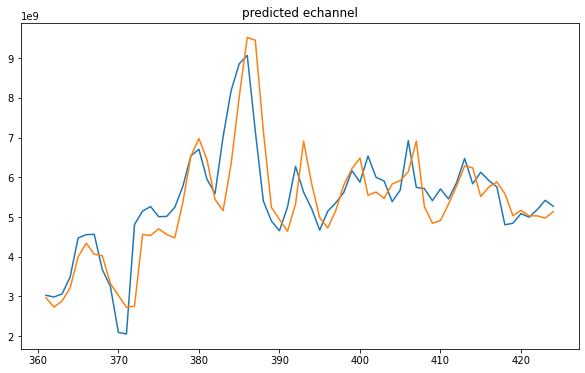

In [20]:
plot_predicted_series(time_test,x_test_echannel,lin_forecast_echannel,'predicted echannel')

In [21]:
keras.metrics.MSLE(x_test_echannel, lin_forecast_echannel).numpy()

0.02057558

In [22]:
lin_forecast_echannel_ori = model_forecast(model_echannel, series_echannel[(len(series_echannel) - split_time_2) - window_size:-1], 
                                       window_size)[:, 0]
keras.metrics.MSLE(x_test_echannel, lin_forecast_echannel_ori).numpy()

0.025069114

###### Predict 'kas echannel' value for the next 31 days

In [23]:
series_echannel_test = np.array(series_echannel[len(series_echannel) - window_size:])
for i in range(31):
    lin_forecast_echannel_test = model_forecast(new_model_echannel, series_echannel_test[len(series_echannel_test)-window_size:], 
                                                window_size)[:,0]
    new_value = lin_forecast_echannel_test[len(lin_forecast_echannel_test )-1]
    series_echannel_test = np.append(series_echannel_test, lin_forecast_echannel_test)

In [24]:
series_echannel_test[len(series_echannel_test)-31:]

array([4.91160166e+09, 4.99672371e+09, 5.41703526e+09, 5.20956979e+09,
       5.03921869e+09, 4.89021440e+09, 4.80643994e+09, 4.58129408e+09,
       4.61140531e+09, 4.74457754e+09, 4.62583706e+09, 4.56035021e+09,
       4.55571098e+09, 4.42006579e+09, 4.14960666e+09, 4.06546432e+09,
       4.16475341e+09, 4.14300467e+09, 4.13566157e+09, 4.12829568e+09,
       4.01017139e+09, 3.83872742e+09, 3.82942234e+09, 3.93531059e+09,
       3.90343680e+09, 3.79200205e+09, 3.70387456e+09, 3.61107021e+09,
       3.50724813e+09, 3.47996211e+09, 3.50677018e+09])

In [25]:
#new_model_echannel.save('kas_echannel_forecasting2.h5')

###### Get the final result

In [26]:
result = np.append(series_kantor_test[len(series_kantor_test)-31:],series_echannel_test[len(series_echannel_test)-31:])
result

array([1.15327862e+13, 1.16702797e+13, 1.17602014e+13, 1.18315349e+13,
       1.19448776e+13, 1.19812915e+13, 1.21364829e+13, 1.22414904e+13,
       1.23646677e+13, 1.24868289e+13, 1.25539944e+13, 1.26876941e+13,
       1.27456541e+13, 1.28996176e+13, 1.30349783e+13, 1.31791501e+13,
       1.32963275e+13, 1.33774516e+13, 1.35247723e+13, 1.36268952e+13,
       1.37809227e+13, 1.39387701e+13, 1.41073318e+13, 1.42396663e+13,
       1.43979908e+13, 1.44952315e+13, 1.46397746e+13, 1.47784005e+13,
       1.49028298e+13, 1.50961704e+13, 1.51968536e+13, 4.91160166e+09,
       4.99672371e+09, 5.41703526e+09, 5.20956979e+09, 5.03921869e+09,
       4.89021440e+09, 4.80643994e+09, 4.58129408e+09, 4.61140531e+09,
       4.74457754e+09, 4.62583706e+09, 4.56035021e+09, 4.55571098e+09,
       4.42006579e+09, 4.14960666e+09, 4.06546432e+09, 4.16475341e+09,
       4.14300467e+09, 4.13566157e+09, 4.12829568e+09, 4.01017139e+09,
       3.83872742e+09, 3.82942234e+09, 3.93531059e+09, 3.90343680e+09,
      

In [27]:
CRO_prediction = pd.DataFrame({'index' : [i for i in range(len(result))],
                              'value' : result})
CRO_prediction

,index,value
0,0,1.153279e+13
1,1,1.167028e+13
2,2,1.176020e+13
3,3,1.183153e+13
4,4,1.194488e+13
...,...,...
57,57,3.703875e+09
58,58,3.611070e+09
59,59,3.507248e+09
60,60,3.479962e+09


In [28]:
#CRO_prediction.to_csv('Cash Ratio Optimization Prediction5d.csv', index = False)